In [1]:
#importing all of the necessary packages that we will use.
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow import keras
import keras.layers as layers
from keras import callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Automatically creating a new folder that splits each of the 10 categories into a train/test/validation folders. Uses splitfolders.
#The file paths would have to be changed to your own username/folders for it to work locally.
data_dir = "C:/Users/rwnau/Desktop/ML/MLDataset"
splitfolders.ratio(data_dir, output= "C:/Users/rwnau/Desktop/Dataset", seed = 42, ratio = (.8, .1, .1), group_prefix = None, move = False)

train_dir = "C:/Users/rwnau/Desktop/Dataset/train"
val_dir = "C:/Users/rwnau/Desktop/Dataset/val"
test_dir = "C:/Users/rwnau/Desktop/Dataset/test"

In [3]:
#Using keras preprocessing on the training images, but only applying a rescale to the validation images.
#Images are going to be sized to 227x227 and colored in RGB in batches of 64 with a data shuffle.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (227, 227),
                                               color_mode = 'rgb',
                                               class_mode = 'categorical',
                                               batch_size = 64,
                                               shuffle = True)

val_data = val_datagen.flow_from_directory(directory = val_dir,
                                              target_size = (227, 227),
                                              class_mode = 'categorical', 
                                              color_mode = 'rgb',
                                              batch_size = 64,
                                              shuffle = True)
test_data = val_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (227, 227),
                                              class_mode = 'categorical', 
                                              color_mode = 'rgb',
                                              batch_size = 64,
                                              shuffle = True)

Found 20938 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.


In [ ]:
#Creating the AlexNet CNN architecture with 227x227 image input.
AlexNet = keras.Sequential()
AlexNet.add(layers.Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = (227,227,3)))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.MaxPool2D(pool_size = (3,3), strides = (2,2)))
AlexNet.add(layers.Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = "same"))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.MaxPool2D(pool_size = (3,3), strides = (2,2)))
AlexNet.add(layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = "same"))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = "same"))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = "same"))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.MaxPool2D(pool_size = (3,3), strides = (2,2)))
AlexNet.add(layers.Flatten())
AlexNet.add(layers.Dense(4096, activation = 'relu'))
AlexNet.add(layers.Dropout(0.5))
AlexNet.add(layers.Dense(4096, activation = 'relu'))
AlexNet.add(layers.Dropout(0.5))
AlexNet.add(layers.Dense(10, activation = 'softmax')) #10 categories, so input of 10 with the softmax layer

In [ ]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate = .0001) , metrics = ['accuracy'])

In [ ]:
#Ideally earlystopping will help with overfitting on the training images.
earlystopping = callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 5, restore_best_weights = True)

In [ ]:
x = AlexNet.fit(train_data, epochs = 30, validation_data = val_data, steps_per_epoch = 20000//64, validation_steps = 2614//64, callbacks = [earlystopping])

Epoch 1/30
312/312 [==============================] - 246s 782ms/step - loss: 2.2347 - accuracy: 0.3507 - val_loss: 3.3038 - val_accuracy: 0.1887
Epoch 2/30
312/312 [==============================] - 241s 772ms/step - loss: 1.5051 - accuracy: 0.4914 - val_loss: 1.6940 - val_accuracy: 0.4425
Epoch 3/30
312/312 [==============================] - 242s 775ms/step - loss: 1.2987 - accuracy: 0.5589 - val_loss: 1.3579 - val_accuracy: 0.5287
Epoch 4/30
312/312 [==============================] - 242s 775ms/step - loss: 1.1701 - accuracy: 0.6057 - val_loss: 1.2885 - val_accuracy: 0.5671
Epoch 5/30
312/312 [==============================] - 241s 772ms/step - loss: 1.0854 - accuracy: 0.6332 - val_loss: 1.6204 - val_accuracy: 0.4608
Epoch 6/30
312/312 [==============================] - 241s 772ms/step - loss: 0.9918 - accuracy: 0.6668 - val_loss: 0.9640 - val_accuracy: 0.6667
Epoch 7/30
312/312 [==============================] - 242s 774ms/step - loss: 0.9461 - accuracy: 0.6838 - val_loss: 1.2366 -

In [ ]:
AlexNet.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

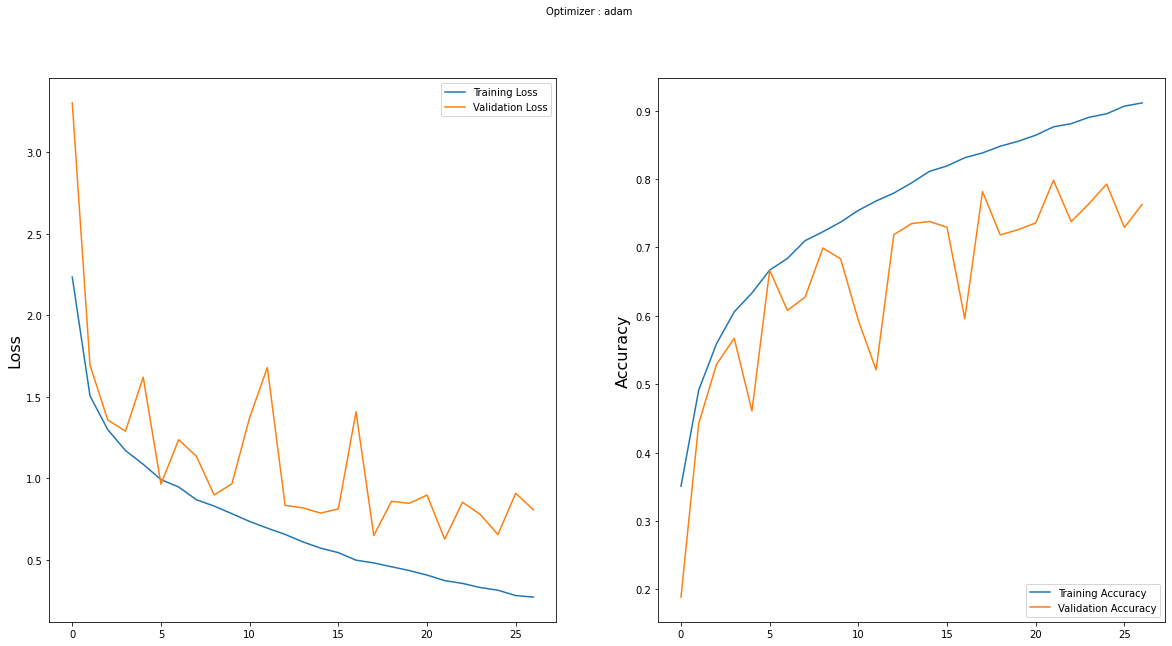

In [ ]:
#Plotting the training vs validation loss and accuracy curves.
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(AlexNet.history.history['loss'], label = 'Training Loss')
plt.plot(AlexNet.history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(AlexNet.history.history['accuracy'], label = 'Training Accuracy')
plt.plot(AlexNet.history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#Overall evaluation of the AlexNet model.
score = AlexNet.evaluate(test_data, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6256281137466431 / Test accuracy: 0.7983209490776062


In [ ]:
#Getting the classification predictions using our model in order to create a confusion matrix and classification report.
Y_pred = AlexNet.predict(test_data, steps = 82)
y_pred = np.argmax(Y_pred, axis = 1)

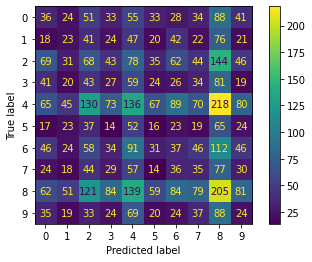

In [ ]:
#Using confusionmatrixdisplay we can get a better visual of the confusion matrix.
ConfusionMatrixDisplay(confusion_matrix(test_data.classes, y_pred)).plot()